In [13]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom

# import HFC_IL mixture properties
from HFC125_emimTf2N_PR import configuration

# parmest (binary_param2)
from binary_param2 import binary_params_peng
# from HFC32_emimTf2N_PR import configuration
from HFC125_emimTf2N_PR import configuration
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [14]:
#need to make excel csv for 125
data = pd.read_csv('R125_emimTf2N.csv')
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 323
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)

In [15]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-05-17 15:40:15 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


# Create Flash Model

In [4]:
binary_params_peng(data_348, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  348.1, init_press =  100000 , init_x_c1 =    0.018, init_x_c2 = 0.982,
    init_kappa_2_1 = -0.003, init_kappa_1_2 = -0.016, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-17 15:35:14 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:35:14 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:35:14 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:35:14 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:35:14 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:35:14 [INFO] idaes.init.fs.state_

## Sensitivity Analysis

In [5]:
# anlaysis
kappa21= np.array([-0.025,-0.035,-0.045,-0.055])
kappa12= np.array([-0.006,-0.016,-0.026,-0.036])
# plot_sens_analysis(data_283,kappa21,kappa12, "T=283 K")

In [6]:
R125_x,P= calc_outlet_xP(data,m,"R125", "emimTf2N", -0.03, -0.016,verbose=False)

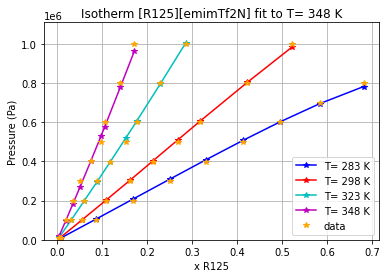

In [7]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:36],P[27:36],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTf2N] fit to T= 348 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

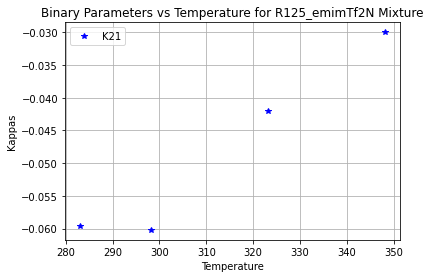

K21 Values for T=  [283.1 298.1 323.1 348.1] are: 
[-0.05967357 -0.06020143 -0.04196707 -0.03      ]


In [8]:
K21=np.array([-0.05967357, -0.06020143, -0.04196707, -0.03])
T = np.array([283.1, 298.1, 323.1, 348.1]) #K
plt.plot(T,K21,"*",color='blue',label="K21")
plt.title('Binary Parameters vs Temperature for R125_emimTf2N Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K21 Values for T= ', T, 'are: ')
print(K21)

# T=298 linear kappas

In [16]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-05-17 15:40:57 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [17]:
binary_params_peng(data_298, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  348.1, init_press =  100000 , init_x_c1 =    0.018, init_x_c2 = 0.982,
    init_kappa_2_1 = -0.053, init_kappa_1_2 = -0.019, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-17 15:41:31 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:41:32 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:41:32 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:41:32 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:41:32 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:41:32 [INFO] idaes.init.fs.state_

In [21]:
R125_x,P= calc_outlet_xP(data_298,m,"R125", "emimTf2N", -0.053, -0.0192,verbose=False)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


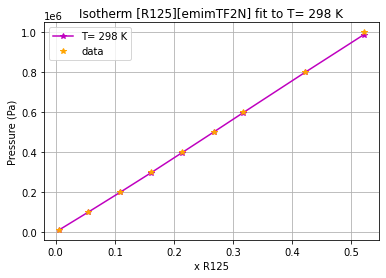

In [24]:
plt.plot(R125_x,P,"m*-",label="T= 298 K")
plt.plot(data_298["x_R125"],data_298["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTF2N] fit to T= 298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
# plt.ylim(0,1300000)
plt.legend()
plt.show()

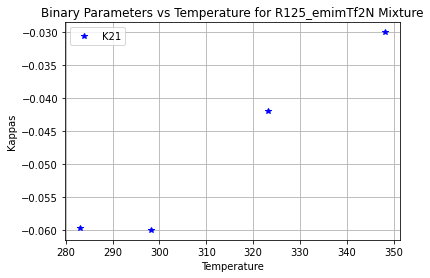

K21 Values for T=  [283.1 298.1 323.1 348.1] are: 
[-0.05967357 -0.06       -0.04196707 -0.03      ]


In [18]:
K21=np.array([-0.05967357, -0.06, -0.04196707, -0.03])
T = np.array([283.1, 298.1, 323.1, 348.1]) #K
plt.plot(T,K21,"*",color='blue',label="K21")
plt.title('Binary Parameters vs Temperature for R125_emimTf2N Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K21 Values for T= ', T, 'are: ')
print(K21)

In [ ]:
k21_298= -0.053
k12_298= -0.01921155